# <h1 align = 'center'>  Big Mart Sales </h1>

# 1. Introduction

## 1.1 Objective of this project

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

## 1.2 Recognizing variables in dataset

* Item_Identifier ---- Unique product ID
* Item_Weight ---- Weight of product
* Item_Fat_Content ---- Whether the product is low fat or not
* Item_Visibility ---- The % of the total display area of all products in a store allocated to the particular product
* Item_Type ---- The category to which the product belongs
* Item_MRP ---- Maximum Retail Price (list price) of the product
* Outlet_Identifier ---- Unique store ID
* Outlet_Establishment_Year ---- The year in which the store was established
* Outlet_Size ---- The size of the store in terms of ground area covered
* Outlet_Location_Type ---- The type of city in which the store is located
* Outlet_Type ---- Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales ---- sales of the product in t particular store. This is the outcome variable to be predicted

# 2. File Organisation

## 2.1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor 
from sklearn import metrics
import warnings

In [2]:
warnings.filterwarnings('ignore')

## 2.2 Loading the Dataset 

In [3]:
big_mart_data = pd.read_csv("/kaggle/input/bigmart-sales-data/Train.csv")

## 2.3 Initial Analysis of the Dataset

In [4]:
big_mart_data.shape

(8523, 12)

In [5]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
big_mart_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
big_mart_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


categorical features
* Item_Identifier
* Item_Fat_Content
* Item_Type                  
* Outlet_Identifier
* Outlet_Size   
* Outlet_Location_Type 
* Outlet_Type 


# 3.Preperation for Exploratory Data Analysis

## 3.1 Checking for missing values

In [8]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Two columns in the dataset 'Item_Weight' and 'Outlet_Size' have missing values.

## 3.2 Handling missing values

In [9]:
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)

In [10]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
mode_of_outlet_size = big_mart_data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type',aggfunc = lambda x: x.mode()[0])

In [12]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [13]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [14]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [15]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [16]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# 4.Exploratory Data Analysis

## 4.1 Analysis of Numerical variables

## 4.1.1 Item_Weight_Distribution

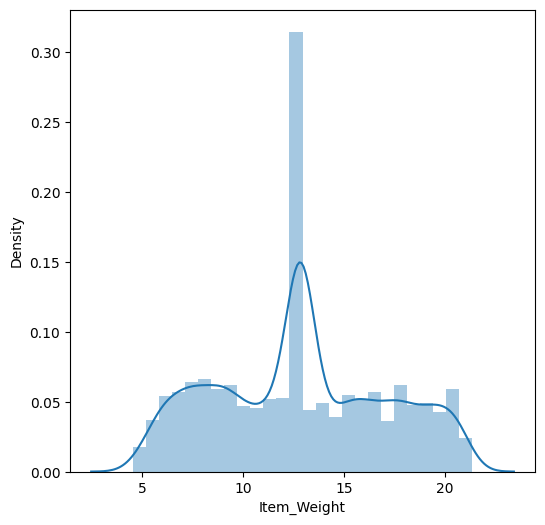

In [18]:
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

## 4.1.2 Item_Visibility Distribution

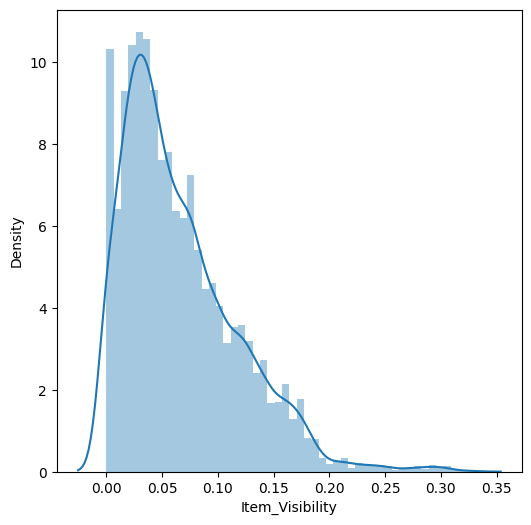

In [19]:
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

## 4.1.3 Item MRP distribution 

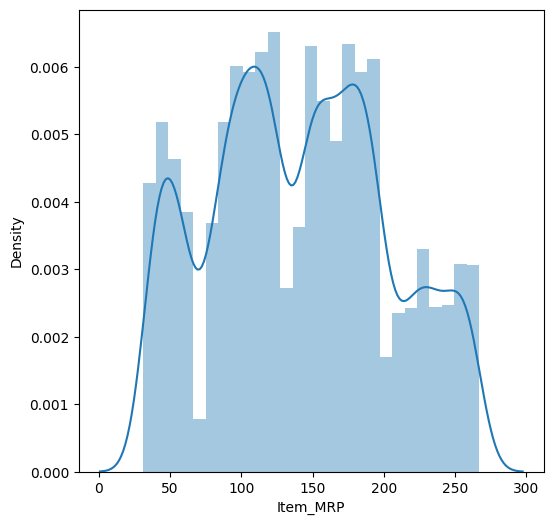

In [20]:
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

## 4.1.4 Item_Outlet_Sales distribution 

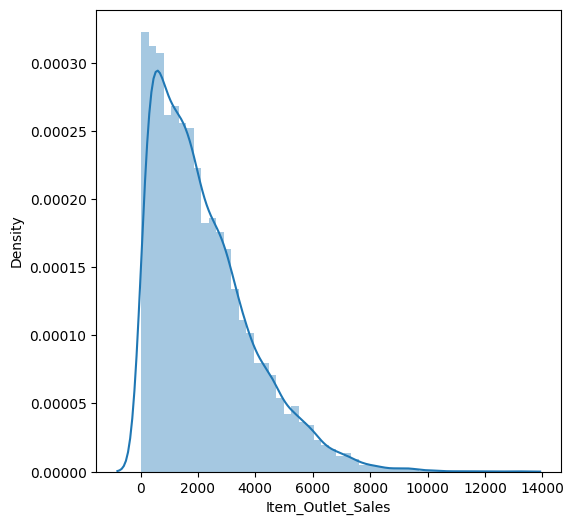

In [21]:
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

## 4.1.5 Outlet_Establishment_Year Distribution

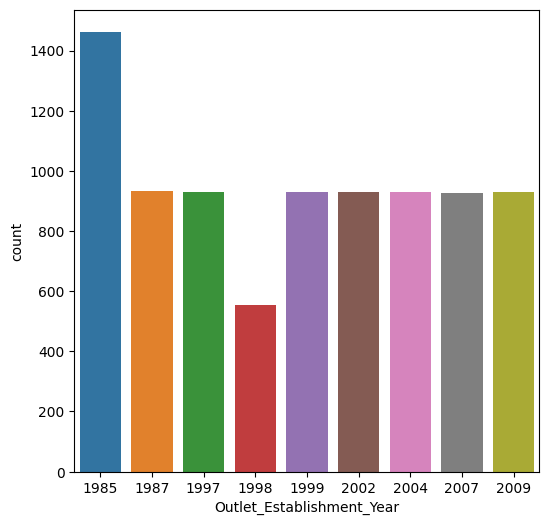

In [22]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = big_mart_data)
plt.show()

## 4.2 Categorical Variable Analysis

## 4.2.1 Item_Fat_Content Distribution 

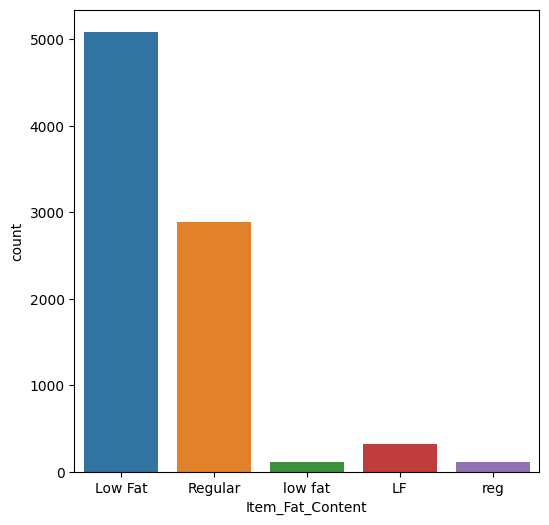

In [23]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content', data = big_mart_data)
plt.show()

## 4.2.2 Item_Type Distribution

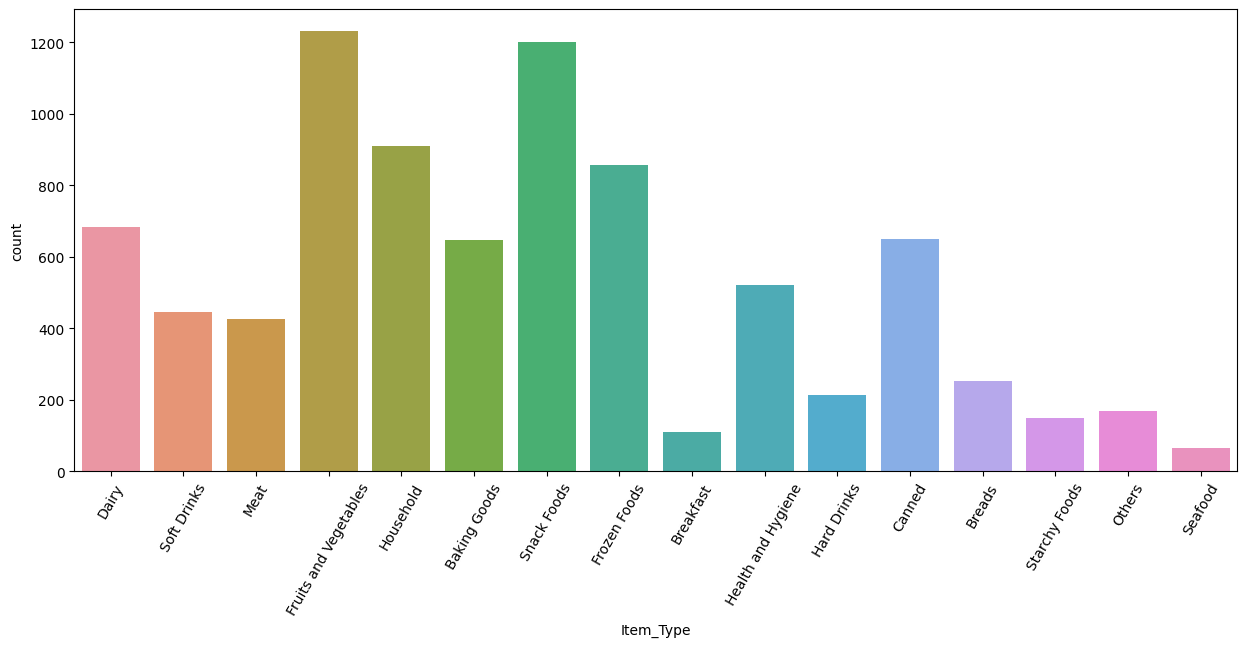

In [24]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'Item_Type', data = big_mart_data)
plt.xticks(rotation=60)
plt.show()


In [25]:
print(big_mart_data['Outlet_Size'].head(10))

0    Medium
1    Medium
2    Medium
3     Small
4      High
5    Medium
6      High
7    Medium
8     Small
9     Small
Name: Outlet_Size, dtype: object


## 4.2.3 Outlet_Size Distribution

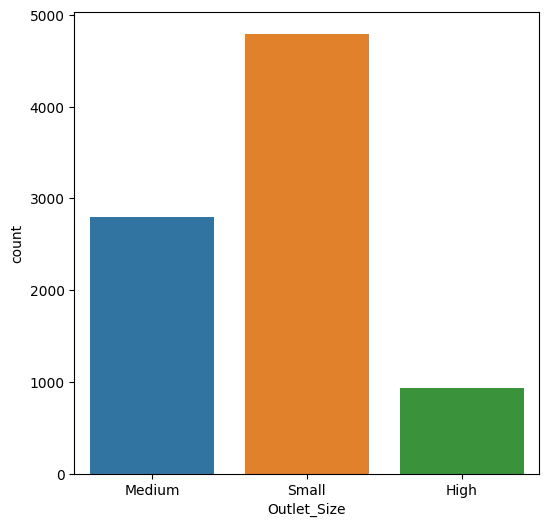

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

# 5.Data Preprocessing

In [27]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [28]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':"Low Fat", 'reg': 'Regular'}}, inplace = True)

In [29]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

## 5.1 Label Encoding

In [30]:
encoder = LabelEncoder()

In [31]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])




In [32]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## 5.2 Splitting Features and Targets

In [33]:
X = big_mart_data.drop(columns = ['Item_Outlet_Sales'])

In [34]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [35]:
 y = big_mart_data['Item_Outlet_Sales']

In [36]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## 5.3 Splitting data into training data and testing data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2)

In [38]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [40]:
print(y.shape, y_train.shape, y_test.shape)

(8523,) (6818,) (1705,)


In [41]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,627,11.800000,1,0.057422,10,149.9366,8,1997,2,0,1
1,996,12.857645,0,0.000000,0,100.1384,5,1985,1,2,3
2,1127,7.725000,0,0.047783,3,249.1092,8,1997,2,0,1
3,439,10.500000,0,0.052555,5,89.6830,8,1997,2,0,1
4,993,12.857645,1,0.235859,13,46.1402,4,1985,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6813,600,7.235000,0,0.099963,13,193.8452,8,1997,2,0,1
6814,680,19.350000,0,0.118103,13,224.8088,8,1997,2,0,1
6815,969,18.700000,1,0.092096,10,183.3292,2,2007,2,1,1
6816,55,8.880000,0,0.086957,7,152.5682,7,2002,2,1,1


## 5.4 Standardize the data

In [42]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[['Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year']]) ,
                              columns = ['Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year'])
X_test_scaled = scaler.transform(X_test[['Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year']] )

In [43]:
X_train[['Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year']] = X_train_scaled

In [44]:
X_test[['Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year']] = X_test_scaled

In [45]:
X_train_scaled

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.241511,-0.170030,0.142044,-0.099938
1,0.008340,-1.285498,-0.658577,-1.533910
2,-1.204161,-0.357270,1.736475,-0.099938
3,-0.548614,-0.264562,-0.826672,-0.099938
4,0.008340,3.296290,-1.526724,-1.533910
...,...,...,...,...
6813,-1.319915,0.656367,0.847977,-0.099938
6814,1.542050,1.008758,1.345789,-0.099938
6815,1.388498,0.503551,0.678908,1.095039
6816,-0.931311,0.403726,0.184354,0.497551


In [46]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,627,-0.241511,1,-0.170030,10,0.142044,8,-0.099938,2,0,1
1,996,0.008340,0,-1.285498,0,-0.658577,5,-1.533910,1,2,3
2,1127,-1.204161,0,-0.357270,3,1.736475,8,-0.099938,2,0,1
3,439,-0.548614,0,-0.264562,5,-0.826672,8,-0.099938,2,0,1
4,993,0.008340,1,3.296290,13,-1.526724,4,-1.533910,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6813,600,-1.319915,0,0.656367,13,0.847977,8,-0.099938,2,0,1
6814,680,1.542050,0,1.008758,13,1.345789,8,-0.099938,2,0,1
6815,969,1.388498,1,0.503551,10,0.678908,2,1.095039,2,1,1
6816,55,-0.931311,0,0.403726,7,0.184354,7,0.497551,2,1,1


In [47]:
X_test 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,496,0.008340,0,0.652190,6,-1.058993,5,-1.533910,1,2,3
1,382,-0.158829,0,1.267960,5,1.700088,7,0.497551,2,1,1
2,1207,-1.658909,0,1.263599,4,-0.856669,7,0.497551,2,1,1
3,1415,0.986902,0,0.412089,8,-0.257696,0,0.019560,2,2,0
4,910,0.008340,0,-1.099297,5,-0.620583,4,-1.533910,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1700,608,0.008340,0,-0.556922,13,-0.238445,5,-1.533910,1,2,3
1701,835,1.695601,1,-0.739271,6,-1.516528,6,0.736546,2,1,1
1702,1286,1.482991,0,2.177615,9,0.503874,2,1.095039,2,1,1
1703,756,1.388498,0,-1.285498,13,1.857987,3,1.334034,1,2,2


In [48]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# 6.Model Training

## 6.1 Linear Regression model

In [49]:
from sklearn.linear_model import LinearRegression

## 6.1.1 Model Training

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 6.1.2 Model Evaluation

In [51]:
y_pred = model.predict(X_test)
r2_score_test = metrics.r2_score(y_test, y_pred)

In [52]:
y_train_pred = model.predict(X_train)
r2_score_train = metrics.r2_score(y_train, y_train_pred)

In [53]:
print('Accuracy on the training set', r2_score_train)
print('Accuracy on the test set', r2_score_test)

Accuracy on the training set 0.5071929167339231
Accuracy on the test set 0.48912987193626334


## 6.2 Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

## 6.2.1 Model Training

In [55]:
DTR_Model = DecisionTreeRegressor(random_state = 42)
DTR_Model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## 6.2.2 Model Evaluation

In [56]:
y_test_pred = DTR_Model.predict(X_test)
y_train_pred = DTR_Model.predict(X_train)



In [57]:
r2_score_test = metrics.r2_score(y_test, y_test_pred)
r2_score_train = metrics.r2_score(y_train, y_train_pred)

In [58]:
print('R Squared Value for training data :', r2_score_train)
print("R Squared value for test data :", r2_score_test)

R Squared Value for training data : 1.0
R Squared value for test data : 0.16637269449834724


## 6.2.3 HyperParameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
import warnings
warnings.filterwarnings('ignore')

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Create a Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)



# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_decision_tree_model = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}


## 6.2.4 Model Evaluation(After Hyper parameter Tuning)

In [61]:
# Make predictions on the test set using the best model
y_test_pred = best_decision_tree_model.predict(X_test)
y_train_pred = best_decision_tree_model.predict(X_train)

In [62]:
r2_test = metrics.r2_score(y_test, y_test_pred )
r2_train = metrics.r2_score(y_train, y_train_pred )

In [63]:
print("R Squared Value for training data", r2_train)
print('R Squared value for test data ', r2_test)

R Squared Value for training data 0.6086616387326657
R Squared value for test data  0.5802102277405643


## 6.3 Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
RFR_Model = RandomForestRegressor(random_state = 42)

## 6.3.1 Model Training

In [66]:
RFR_Model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## 6.3.2 Model Evaluation

In [67]:
# Make predictions on the test set using the best model
y_test_pred = RFR_Model.predict(X_test)
y_train_pred = RFR_Model.predict(X_train)

In [68]:
r2_test = metrics.r2_score(y_test, y_test_pred )
r2_train = metrics.r2_score(y_train, y_train_pred )

In [69]:
print("R Squared Value for training data", r2_train)
print('R Squared value for test data ', r2_test)

R Squared Value for training data 0.938390030569875
R Squared value for test data  0.5519560657284744


## 6.3.3 HyperParameter Tuning

In [70]:
warnings.filterwarnings('ignore')

# Create a RandomForestRegressor
random_forest_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_random_forest_model = grid_search.best_estimator_



Best Hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


## 6.3.4 Model Evaluation(After HyperParameter Tuning)

In [71]:
# Make predictions on the test set using the best model
y_test_pred = best_random_forest_model.predict(X_test)
y_train_pred = best_random_forest_model.predict(X_train)

In [72]:
r2_test = metrics.r2_score(y_test, y_test_pred )
r2_train = metrics.r2_score(y_train, y_train_pred )

In [73]:
print("R Squared Value for training data", r2_train)
print('R Squared value for test data ', r2_test)

R Squared Value for training data 0.6145137928602726
R Squared value for test data  0.5812775920034859


## 6.4 XGBoost Regressor

In [74]:
regressor = XGBRegressor()

## 6.4.1 Model Training

In [75]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 6.4.2 Model Evaluation

In [76]:
# Prediction on training data
y_train_pred = regressor.predict(X_train)

In [77]:
# R squared value
r2_train = metrics.r2_score(y_train, y_train_pred)

In [78]:
y_test_pred = regressor.predict(X_test)

In [79]:

r2_test = metrics.r2_score(y_test, y_test_pred )

In [80]:
print("R Squared Value for training data", r2_train)
print('R Squared value for test data ', r2_test)

R Squared Value for training data 0.8762174618111388
R Squared value for test data  0.5017253991620692


## 6.4.3 HyperParameter Tuning to resolve Overfitting

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
xgb_model = XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 1.0}


## 6.4.4 Model Evaluation(AfterHyperParameter Tuning)

In [83]:
# Make predictions on the test set using the best model
y_pred = best_xgb_model.predict(X_test)

In [84]:
r2_score_test = metrics.r2_score(y_test, y_pred)

In [85]:
y_pred_train = best_xgb_model.predict(X_train)
r2_score_train = metrics.r2_score(y_train, y_pred_train)

In [86]:
print('R Squared Value for the training data ', r2_score_train)
print('R Squared Value for the test data ', r2_score_test)

R Squared Value for the training data  0.6174428498902447
R Squared Value for the test data  0.582504446658439


# 7.Project Conclusion

**The activities we carried out within the scope of the project are as follows:**
1. Within the scope of the project, we first made the data set ready for **Exploratory Data Analysis(EDA)**
2. We performed **Exploratory Data Analysis(EDA)**. 
3. We analyzed numerical and categorical variables within the scope of univariate analysis by using **Distplot** and **Countplot** graphics.
5. We made the data set ready for the model. In this context, we struggled with **missing** values. 
6. We used **four different algorithms** in the model phase.
7. We got **50.71% accuracy for training data** and **48.91% accuracy for test data** with the **Linear Regression model**.
8. We got **60.86% accuracy for training data** and **58% accuracy for test data** with the **Decision Tree Regressor Model**.
9. We got **61.14% accuracy for training data** and **58.12% accuracy for test data** with the **Random Forest Regressor Model**.
10. And we got **61.74% accuracy** and **58.25% accuracy with test data** with the **XGBoost Model**.
11. When all these model outputs are evaluated, we **prefer** the model we created with the **XGBoost**, which gives the **best results**.
